In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

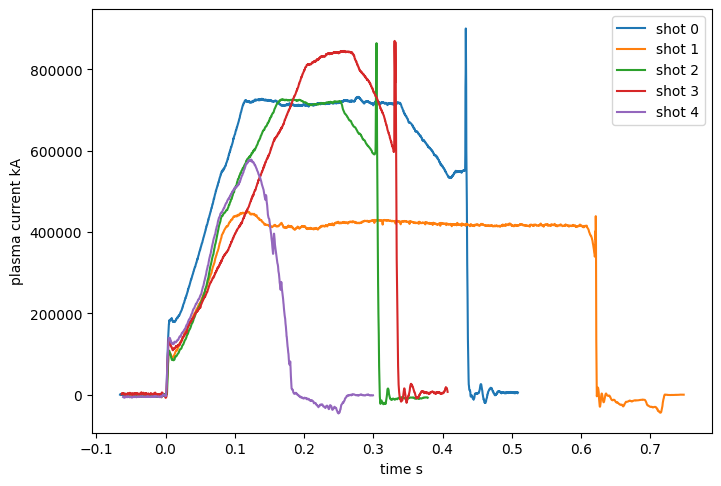

In [24]:
source_ids = np.array([15585, 15212, 15010, 14998, 30410, 30418, 30420])

rng = np.random.default_rng(7)
rng.shuffle(source_ids)
source_ids = pd.Series(source_ids)

split_ids = {
    "train": source_ids[:5],
    "test": source_ids[5:],
}

plt.subplots(figsize=(8, 5.5))
for shot_index, shot_id in enumerate(split_ids["train"]):
    summary = xr.open_datatree(
        f"https://s3.echo.stfc.ac.uk/mast/level2/shots/{shot_id}.zarr",
        engine="zarr",
        group="summary",
    )
    summary["ip"].plot(label=f"shot {shot_index}")
plt.legend()
plt.xlabel("time s")
plt.ylabel("plasma current kA")
plt.show()


In [25]:
magnetics = xr.open_zarr(
    f"https://s3.echo.stfc.ac.uk/mast/level2/shots/{shot_id}.zarr", group="magnetics"
)
# Split the dataset into 4 systems based on time coordinates
systems = {
    "poloidal": magnetics.drop_dims(
        [
            dim
            for dim in ["time_mirnov", "time_saddle", "time_omaha"]
            if dim in magnetics.dims
        ]
    ).drop_vars(
        [
            "b_field_pol_probe_cc_channel",
            # "b_field_pol_probe_ccbv_channel",
            # "b_field_pol_probe_obr_channel",
            # "b_field_pol_probe_obv_channel",
            "b_field_pol_probe_omv_channel",
            "b_field_tor_probe_cc_channel",
            "b_field_tor_probe_omaha_channel",
            "b_field_tor_probe_saddle_field_channel",
            "b_field_tor_probe_saddle_voltage_channel",
            # "flux_loop_channel"
        ]
    ),
    "mirnov": magnetics.drop_dims(
        [dim for dim in ["time", "time_saddle", "time_omaha"] if dim in magnetics.dims]
    )
    .drop_vars(
        [
            # "b_field_pol_probe_cc_channel",
            "b_field_pol_probe_ccbv_channel",
            "b_field_pol_probe_obr_channel",
            "b_field_pol_probe_obv_channel",
            # "b_field_pol_probe_omv_channel",
            # "b_field_tor_probe_cc_channel",
            "b_field_tor_probe_omaha_channel",
            "b_field_tor_probe_saddle_field_channel",
            "b_field_tor_probe_saddle_voltage_channel",
            "flux_loop_channel",
        ]
    )
    .rename({"time_mirnov": "time"}),
    "saddle": magnetics.drop_dims(
        [dim for dim in ["time", "time_mirnov", "time_omaha"] if dim in magnetics.dims]
    )
    .drop_vars(
        [
            "b_field_pol_probe_cc_channel",
            "b_field_pol_probe_ccbv_channel",
            "b_field_pol_probe_obr_channel",
            "b_field_pol_probe_obv_channel",
            "b_field_pol_probe_omv_channel",
            "b_field_tor_probe_cc_channel",
            "b_field_tor_probe_omaha_channel",
            # "b_field_tor_probe_saddle_field_channel",
            # "b_field_tor_probe_saddle_voltage_channel",
            "flux_loop_channel",
        ]
    )
    .rename({"time_saddle": "time"}),
    "omaha": magnetics.drop_dims(
        [dim for dim in ["time", "time_mirnov", "time_saddle"] if dim in magnetics.dims]
    )
    .drop_vars(
        [
            "b_field_pol_probe_cc_channel",
            "b_field_pol_probe_ccbv_channel",
            "b_field_pol_probe_obr_channel",
            "b_field_pol_probe_obv_channel",
            "b_field_pol_probe_omv_channel",
            "b_field_tor_probe_cc_channel",
            # "b_field_tor_probe_omaha_channel",
            "b_field_tor_probe_saddle_field_channel",
            "b_field_tor_probe_saddle_voltage_channel",
            "flux_loop_channel",
        ]
    )
    .rename({"time_omaha": "time"}),
}
magnetics = xr.DataTree.from_dict(systems)

In [26]:
poloidal = magnetics["poloidal"].to_dataset()
mirnov = magnetics["mirnov"].to_dataset()
saddle = magnetics["saddle"].to_dataset()
omaha = magnetics["omaha"].to_dataset()

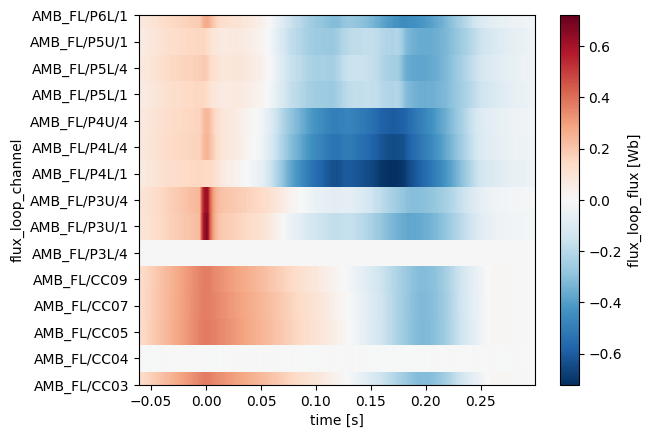

In [28]:
poloidal.flux_loop_flux.plot()